# Crimes

In [234]:
# math 
import numpy as np

# dataframes
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# linear regression
import statsmodels.api as sm
import statsmodels.formula.api as smf

# dates and locations and weather
from meteostat import Point, Daily
from datetime import datetime

In [235]:
# download crimes data from https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
# and save it as crimes.csv
df = pd.read_csv('~/Downloads/crimes.csv', nrows=5000000)
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [236]:
# how many crimes in each year?
df.groupby('Year').size()

Year
2001    467138
2002    459428
2003    461290
2004    457552
2005    441677
2006    437037
2007    428549
2008    414794
2009    291660
2010      5241
2011       283
2012       445
2013       686
2014      1644
2015    184684
2016    261960
2017    261451
2018    261103
2019    139840
2020     19548
2021      2747
2022      1243
dtype: int64

In [237]:
# let's restrict to 2016--2018
df = df[df['Year'].isin([2016, 2017, 2018])]
df.groupby('Year').size()

Year
2016    261960
2017    261451
2018    261103
dtype: int64

In [238]:
# convert date to datetime
df['timestamp'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p')
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,timestamp
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN,2018-09-01 00:01:00
9,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN,2016-05-01 00:25:00
158,11645648,JC212959,01/01/2018 08:00:00 AM,024XX N MONITOR AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN,2018-01-01 08:00:00
278,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,14.0,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN,2018-12-20 16:00:00
312,11645557,JC212685,04/01/2018 12:01:00 AM,080XX S VERNON AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,44.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN,2018-04-01 00:01:00


In [239]:
# Introduce a column for month and for day
df['Month'] = df['timestamp'].apply(lambda t: t.month)
df['Day'] = df['timestamp'].apply(lambda t: t.day)
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,timestamp,Month,Day
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN,2018-09-01 00:01:00,9,1
9,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN,2016-05-01 00:25:00,5,1
158,11645648,JC212959,01/01/2018 08:00:00 AM,024XX N MONITOR AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN,2018-01-01 08:00:00,1,1
278,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN,2018-12-20 16:00:00,12,20
312,11645557,JC212685,04/01/2018 12:01:00 AM,080XX S VERNON AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN,2018-04-01 00:01:00,4,1


In [240]:
crimes = df.groupby(['Month','Day','Year']).size()
crimes.head()

Month  Day  Year
1      1    2016    1051
            2017    1089
            2018     826
       2    2016     565
            2017     596
dtype: int64

In [241]:
# group by date and count crimes on each date
crimes = df.groupby(['Month','Day','Year']).size().reset_index(name='count')
crimes.head()

,Month,Day,Year,count
0,1,1,2016,1051
1,1,1,2017,1089
2,1,1,2018,826
3,1,2,2016,565
4,1,2,2017,596


In [242]:
# reintroduce a date column
crimes['date'] = crimes.apply(lambda row: datetime(row['Year'], row['Month'], row['Day']), axis=1)
crimes.head()

,Month,Day,Year,count,date
0,1,1,2016,1051,2016-01-01
1,1,1,2017,1089,2017-01-01
2,1,1,2018,826,2018-01-01
3,1,2,2016,565,2016-01-02
4,1,2,2017,596,2017-01-02


<AxesSubplot:xlabel='date', ylabel='count'>

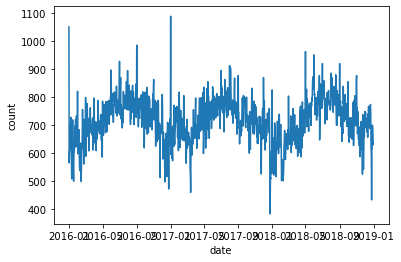

In [243]:
sns.lineplot(x='date', y='count', data=crimes)

# temperature in Chicago

In [244]:
# latitude and longitude of Chicago
lat = 41.8781
lon = -87.6298

In [245]:
# Set time period
start = datetime(2016, 1, 1)
end = datetime(2018, 12, 31)

# Create Point for Chicago
chicago = Point(lat, lon, 70)

# Get daily data
weather = Daily(chicago, start, end)
weather = weather.fetch()
weather.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2016-01-01,-2.4,-6.0,0.1,0.0,51.0,247.0,23.8,NaN,1023.1,NaN
2016-01-02,-1.1,-4.9,1.3,0.0,51.0,249.0,18.8,NaN,1018.9,NaN
2016-01-03,-1.4,-3.7,0.1,0.0,51.0,314.0,18.8,NaN,1021.6,NaN
2016-01-04,-1.1,-3.2,0.7,0.0,51.0,4.0,18.1,NaN,1031.7,NaN
2016-01-05,-1.7,-5.4,1.8,0.0,25.0,177.0,15.3,NaN,1033.4,NaN


In [246]:
# annotate the data with the average temperature on each day 
# join the two dataframes on the date column in the first dataframe and the time column in the second dataframe
crimes = crimes.merge(weather, left_on='date', right_on='time')
crimes.sort_values('tmax')
crimes.head()

,Month,Day,Year,count,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,1,1,2016,1051,2016-01-01,-2.4,-6.0,0.1,0.0,51.0,247.0,23.8,NaN,1023.1,NaN
1,1,1,2017,1089,2017-01-01,0.1,-4.9,5.7,0.0,0.0,NaN,8.9,NaN,1020.6,NaN
2,1,1,2018,826,2018-01-01,-18.4,-21.0,-15.4,0.0,51.0,281.0,16.9,NaN,1041.9,NaN
3,1,2,2016,565,2016-01-02,-1.1,-4.9,1.3,0.0,51.0,249.0,18.8,NaN,1018.9,NaN
4,1,2,2017,596,2017-01-02,3.6,0.1,5.7,6.1,0.0,81.0,11.2,NaN,1017.9,NaN


<AxesSubplot:xlabel='tmax', ylabel='count'>

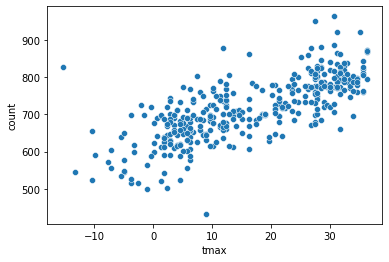

In [248]:
# plot crime as a function of temperature
sns.scatterplot(x='tmax', y='count', data=crimes)

# choose a subsample of data on which to fit our model

In [247]:
# make three datasets, with crimes in 2016, 2017, and 2018
crimes_2016 = crimes[crimes['Year'] == 2016]
crimes_2017 = crimes[crimes['Year'] == 2017]
crimes_2018 = crimes[crimes['Year'] == 2018]

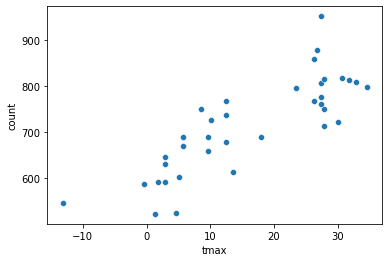

In [252]:
# subsample from the data to split a training and test set
crimes_train = crimes_2018.sample(frac=0.1, random_state=10)
crimes_test = crimes_2018.drop(crimes_train.index)
sns.scatterplot(x='tmax', y='count', data=crimes_train)
train = crimes_train

In [285]:
# overfits 
crimes = crimes_train
# doesn't overfit 
crimes = crimes_2018

# fit the relationship between temperature and crime

<AxesSubplot:xlabel='tmax', ylabel='count'>

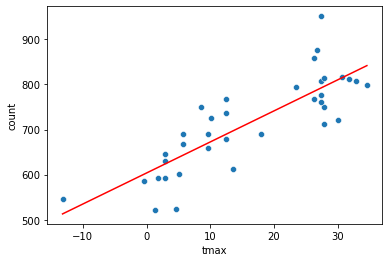

In [286]:
model1 = smf.ols(formula='count ~ 1 + tmax', data=crimes).fit()
sns.scatterplot(x='tmax', y='count', data=crimes)
sns.lineplot(crimes['tmax'], model1.predict(crimes), color='red')

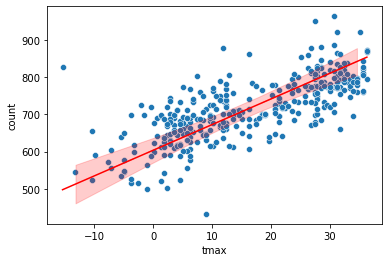

In [287]:
# plot the confidence interval
CI = model1.get_prediction().summary_frame(alpha=0.05)
CI = CI.merge(crimes2018, left_index=True, right_index=True).sort_values('tmax')
sns.scatterplot(x='tmax', y='count', data=crimes2018)
sns.lineplot(crimes2018['tmax'], model1.predict(crimes2018), color='red')
plt.fill_between(CI['tmax'], CI['mean_ci_lower'], CI['mean_ci_upper'], color='red', alpha=0.2)

In [288]:
# how well does the model fit? compute the root mean squared error
def rmse(pred, val):
    return np.sqrt(np.mean((pred - val)**2))

# compute the rmse on the training data
rmse(model1.predict(crimes), crimes['count'])

56.93954971632637

56.70466435109812

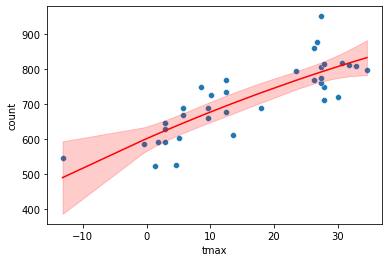

In [289]:
# let's try a model with a quadratic term
model2 = smf.ols(formula='count ~ 1 + tmax + I(tmax**2)', data=crimes).fit()
sns.scatterplot(x='tmax', y='count', data=crimes)
sns.lineplot(crimes['tmax'], model2.predict(crimes), color='red')

# plot the confidence interval
CI = model2.get_prediction().summary_frame(alpha=0.05)
CI = CI.merge(crimes, left_index=True, right_index=True).sort_values('tmax')
plt.fill_between(CI['tmax'], CI['mean_ci_lower'], CI['mean_ci_upper'], color='red', alpha=0.2)

# compute the rmse
rmse(model2.predict(crimes), crimes['count'])

54.11481847720894

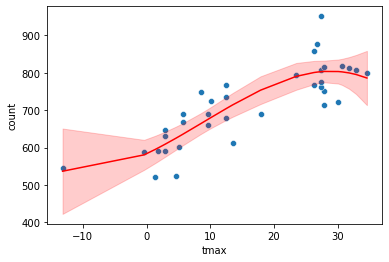

In [290]:
# ...why not keep going?
model3 = smf.ols(formula='count ~ 1 + tmax + I(tmax**2) + I(tmax**3)', data=crimes).fit()
model4 = smf.ols(formula='count ~ 1 + tmax + I(tmax**2) + I(tmax**3) + I(tmax**4)', data=crimes).fit()
model5 = smf.ols(formula='count ~ 1 + tmax + I(tmax**2) + I(tmax**3) + I(tmax**4) + I(tmax**5)', data=crimes).fit()
model = model3

sns.scatterplot(x='tmax', y='count', data=crimes)
sns.lineplot(crimes['tmax'], model.predict(crimes), color='red')

# plot the confidence interval
CI = model.get_prediction().summary_frame(alpha=0.05)
CI = CI.merge(crimes, left_index=True, right_index=True).sort_values('tmax')
plt.fill_between(CI['tmax'], CI['mean_ci_lower'], CI['mean_ci_upper'], color='red', alpha=0.2)

# compute the rmse
rmse(model.predict(crimes), crimes['count'])

# What about performance on new data?

66.19676138093709

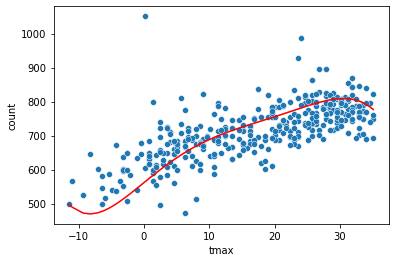

In [291]:
# plot performance on data from 2016
model = model5
sns.scatterplot(x='tmax', y='count', data=crimes_2016)
sns.lineplot(crimes_2016['tmax'], model.predict(crimes_2016), color='red')
rmse(model.predict(crimes_2016), crimes_2016['count'])

In [292]:
# generate models for all polynomial degrees up to 9
max_degree = 9
models = [smf.ols(formula='count ~ 1 + tmax + I(tmax**{})'.format(i), data=crimes).fit() for i in range(2, max_degree+1)]
models.insert(0, smf.ols(formula='count ~ 1 + tmax', data=crimes).fit())

In [293]:
# let's look at how the models perform on data from other years
years = [2016, 2017, 2018]
data = [crimes_2016, crimes_2017, crimes_2018]
rmses = {}
for iyear in range(len(years)):
    year = years[iyear]
    crimes = data[iyear]
    rmses[year] = [rmse(model.predict(crimes), crimes['count']) for model in models]
rmses['order'] = list(range(1, max_degree+1))
rmses = pd.DataFrame(rmses)
rmses.set_index('order', inplace=True)
rmses

,2016,2017,2018
order,,,
1,62.242147,66.215749,60.598115
2,61.622089,65.807326,60.736113
3,61.716631,66.734119,61.722503
4,61.446057,66.757987,61.750413
5,61.412088,67.045700,62.031190
6,61.229999,66.974206,62.064481
7,61.105308,66.902984,62.103187
8,60.996278,66.779720,62.114363
9,60.918530,66.659769,62.135827


<AxesSubplot:xlabel='order'>

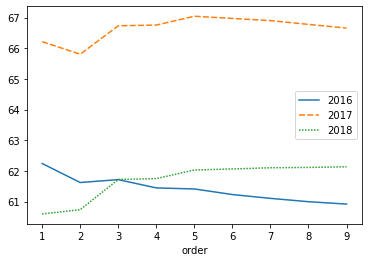

In [294]:
sns.lineplot(data=rmses)